# Geometric Brownian Motion, Black-Scholes, Monte Carlo and Delta Hedging with Python
A detailed study into option pricing models by Jaume Clave  
May 11, 2020


## The Project
The derivative market is __huge__. Often it is estimated at over USD 1 quadrillion $(1,000,000,000,000,000)$. This unimaginable number is made up of numerous derivatives in existence, available on virtually every possible type of investment asset, including equities, commodities, bonds, and currency. The notational value is often debted by researchers, regardless of what is estimated, the derivative market is massive. Options, the study of this projects constitute a sizeable chunk of that valuation. Tens of millions of options are traded daily at quick rates by large banks, hedge funds and smaller investors on the exchanges. Halfway through the trading day on May 11th, 2020, the Exchange-traded fund with the largest trading volume S&P 500 SPDR with 82,043 shares traded for the day. This paper hopes to provide an analytical entrance into that market.

Technology has become an asset in finance: financial institutions are now evolving to technology companies rather than only staying occupied with just the financial aspect: besides the fact that technology brings about innovation the speeds and can help to gain a competitive advantage, the rate and frequency of financial transactions, together with the large data volumes, makes that financial institutions’ attention for technology has increased over the years and that technology has indeed become the main enabler in finance. Python may help investors and institutions create their own functions and workflows that they can control and rely on instead of using a third-party tool. 

This project was completed to gain an understanding of important financial termonolagy, models and processes. The paper begings by introducing the topic and providing definitions of concepts that will be used throughout before providing functions based on the concepts explored. Visualisations are there to help grasp the topics and mathematical formulations directly support the functions. 

## Index

[What is a Derivative?](#What-is-a-Derivative?)  

[Options](#Options)  
i. [European Options](#European-Options)  
ii. [European vs American Options](#European-vs-American-Options)  
iii. [European Call](#European-Call)  
iv. [European Put](#European-Put)

[Convergence of Binomial Model Option Prices to Black-Scholes Prices](#Convergence-of-Binomial-Model-Option-Prices-to-Black-Scholes-Prices)  
i. [Black-Scholes-Merton (BSM) Model](#Black-Scholes-Merton-(BSM)-Model)  
ii.[Assumptions of the Black-Scholes-Merton Model](#Assumptions-of-the-Black-Scholes-Merton-Model)  
iii. [The Black Sholes Formula](#The-Black-Sholes-Formula)  
iv. [Limitations](#Limitations)  

[Binomial Option Pricing Model](#Binomial-Option-Pricing-Model)  
i. [Binomial Option Model Formulation](#Binomial-Option-Model-Formulation)  
ii. [Binomial Option Pricing Model with $N$ Time Periods](#Binomial-Option-Pricing-Model-with-$N$-Time-Periods)  
iii. [Choosing $u$ and $d$: Volatility ($\sigma$)](#Choosing-$u$-and-$d$:-Volatility-($\sigma$))    
iv. [European Call Option Price using Black Sholes](#European-Call-Option-Price-using-Black-Sholes)   
v. [Binomial Model Framework with  $n=10$  Time Periods](#Binomial-Model-Framework-with-$n=10$-Time-Periods)  
vi. [Converging to Black Sholes Price as n becomes Large](#Converging-to-Black-Sholes-Price-as-$n$-becomes-Large)  

[Using Monte-Carlo Simulation to Price Asian Options](#Using-Monte-Carlo-Simulation-to-Price-Asian-Options)  
i. [Monte Carlo](#Monte-Carlo)   
ii. [Monte Carlo in Finance](#Monte-Carlo-in-Finance)   
iii. [The Technique](#The-Technique)   
iv. [Stochastic Calculus](#Stochastic-Calculus)  
    a. [Markov Process](#Markov-Process)  
    b. [Wiener Process/Standard Brownian Motion](#Wiener-Process/Standard-Brownian-Motion)   
    c. [Generalized Wiener Process](#Generalized-Wiener-Process)  
    d. [Itô Process](#Itô-Process)  
    e. [Geometric Brownian Motion](#Geometric-Brownian-Motion)  

[Dynamic Hedging in the Black-Scholes Model](#Dynamic-Hedging-in-the-Black-Scholes-Model)  
i. [What Is Delta?](#What-Is-Delta?)  
ii. [Use of Delta in Hedging](#Use-of-Delta-in-Hedging)  
iii. [Reaching Delta Neutral](#Reaching-Delta-Neutral)   
iv. [Calculating Delta $(\delta)$](#Calculating-Delta-$(\delta)$)  
v. [Replication Strategy](#Replication-Strategy)  
vi. [Profit n' Loss](#Profit-n'-Loss)

## What is a Derivative?
A derivative is a financial security with a value that is reliant upon or __derived__ from, an underlying asset - a benchmark. The derivative itself is a contract between two (or more) parties, and the derivative derives its price from fluctuations in the underlying asset. 

Derivatives can be used to hedge a position, speculate on the directional movement of an underlying asset or give leverage to holdings. They provide a way to lock in prices, hedge against unfavorable movements in rates, and mitigate risks—often for a limited cost. Many different types of derivatives exist; Futures, Forwards, Swaps and Options to name a few. This project will investigate the Options derivative, more concretely a European and Asian call option.

Derivatives are often hard to value because they are based on the price of another asset. Most derivatives are sensitive to changes in the amount of time to expiration, the cost of holding the underlying asset and interest rates. Since the derivative itself has no intrinsic value... its value comes only from the underlying asset and is vulnerable to market sentiment and market risk.

                            Pros:                                           Cons:
                            - Lock in prices                                - Hard to value
                            - Hedge against risk                            - Complex to understand
                            - Can be leveraged                              - Sensitive to supply and demand factors
                            - Diversity the portfolio
    

## Options 
An option, is a type of derivative based on the value of the underlying security. An options contract offers the buyer the opportunity to buy or sell—depending on the type of contract they hold—the underlying asset. Unlike futures, the holder is not required to buy or sell the asset if they choose not to. 

        Call options allow the holder to buy the asset at the stated price within a specific timeframe
        Put options allow the holder to sell the asset at the stated price within a specific timeframe

Each option contract will have a specific expiration date by which the holder must exercise their option. The stated price of an option is known as the strike (K) price.

Option contracts involve a buyer and a seller, where the buyer pays an option premium for the rights granted by the contract. Each call option has a bullish buyer and a bearish seller, while each put option has a bearish buyer and a bullish seller. 

Option contracts tend to represent 100 shares of the underlying security, and the buyer will pay a premium fee for each contract. The premium is based on the strike price, the price for which the derivative contract can be bought or sold at when it is exercised, and the expiration  date. 

### European Options
An European option is a version of a options contract that limits the execution to its expiration date. The call or put option of the option will only take place at the date of the options maturity. If the underlying security such as a stock or commodity has moved in price and investor would not be able to exercise the option early and take delivery of or sell the share/commodity. Instead, the call or put option can only take place at the date of option maturity.

### European vs American Options
Unlike European options, American options can be exercised any time before or on expiration date of the option. The American option allows investors to capture profit as soon as the stock price moves favorably. Since investors have the freedom to exercise their options at any point during the life of the contract, American style options are more valuable than the more limited European options. However, the ability to exercise early carries an added premium or cost.

*The names American and European have nothing to do with the geographic location but only apply to the style of the rights execution

### European Call
A European call option gives the owner the __liberty__ to acquire the underlying security at expiry. For an investor to profit from a call option, the stock's price at expiry, has to be trading high enough above the strike price to cover the cost of the options premium. A call option buyer is bullish on the underlying asset and expects the market price to trade higher than the call option's strike price before or by the expiration date.

In [1]:
## Required modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as si
import math

In [2]:
## European call function
def euro_call(S, K, T, r, sigma):

        # S: spot price
        # K: strike price
        # T: time to maturity 
        # r: interest rate
        # sigma: volatility of underlying asset

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    call = (S * si.norm.cdf(d1, 0, 1) - (K * np.exp(-r * T) * si.norm.cdf(d2, 0, 1)))

    return call 
    

In [3]:
## European call example
call_price = euro_call(100, 100, 1, 0.02, 0.30)
print(f'The price of the Europen call option is ${round(call_price, 4)}')

The price of the Europen call option is $12.8216


### European Put
A European put option allows the holder to sell the underlying security at expiry. For an investor to make a profit from a put option, the stock's price at expiry, has to be trading far enough below the strike price to cover the cost of the option premium. A put option buyer is bearish on the underlying asset and expects the market price to trade lower than the option's strike price before or by the contract's expiration.

In [4]:
## European put function
def euro_put(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    put = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - (S * si.norm.cdf(-d1, 0.0, 1.0)))
    
    return put

In [5]:
## European put function
put_price = euro_put(100, 100, 1, 0.02, 0.30)
print(f'The price of the Europen put option is ${round(put_price, 4)}')

The price of the Europen put option is $10.8414


## Convergence of Binomial Model Option Prices to Black-Scholes Prices
This section outlines a function to compute the prices of European call/put options in the Black-Scholes framework. The code takes as inputs all of the parameters that are required by the Black-Scholes formula

### Black-Scholes-Merton (BSM) Model
The Black Sholes model is a mathematical model that estimates the variation over time of financial instruments and provides the pricing for an options contract. It assumes that these financial instruments will have lognormal distributions of prices. A lognormal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed (Gaussian distribution). This assumption is held in BSM based on the principal that asset prices cannot take a negative value; they are bounded by 0.

The BSM model is used to determine the fair prices of stock options based on six variables: volatility, type, underlying stock price, strike price, time, and risk-free rate. It is based on the principle of hedging and focuses on eliminating risks associated with the volatility of underlying assets and stock options.

The model assumes the price of heavily traded assets follows a geometric Brownian motion with constant drift and volatility. When applied to a stock option, the model incorporates the constant price variation of the stock, the time value of money, the options strike price and the time of the option's expiry.

### Assumptions of the Black-Scholes-Merton Model

        - Lognormal distribution: The Black-Scholes-Merton model assumes that stock prices follow a lognormal distribution 
        based on the principle that asset prices cannot take a negative value; they are bounded by zero.

        - No dividends: The BSM model assumes that the stocks do not pay any dividends or returns.

        - Expiration date: The model assumes that the options can only be exercised on its expiration or maturity date. 
        Hence, it does not accurately price American options. It is extensively used in the European options market.

        - Random walk: The stock market is a highly volatile one, and hence, a state of random walk is assumed as the 
        market direction can never truly be predicted.

        - Frictionless market: No transaction costs, including commission and brokerage, is assumed in the BSM model.

        - Risk-free interest rate: The interest rates are assumed to be constant, hence making the underlying asset a 
        risk-free one.

        - Normal distribution: Stock returns are normally distributed. It implies that the volatility of the market is 
        constant over time.
        
        - No arbitrage: There is no arbitrage. It avoids the opportunity of making a riskless profit.

### The Black Sholes Formula 
The Black Sholes call option formula is calculated by multiplying the stock price by the cumulative standard normal probability distribution function. Thereafter, the net present value (NPV) of the strike price multiplied by the cumulative standard normal distribution is subtracted from the resulting value of the previous calculation:

$$ C = e^{-qT}S_{T}N(d_{1}) - e^{-rT}KN(d_{2}) $$

where:

$$ d_{1} = \frac{ln(\frac{S_{T}}{K}) + (r + \frac{\sigma^{2}}{2}) T } {\sigma \sqrt{T}} $$

and 

$$ d_{2} = d_{1} - \sigma\sqrt{T} $$

Where:  
$C$ = The value at time t of a call option  
$S$ = The spot price of the asset at time t  
$K$ = The strike price of the option  
$T$ = The maturity of the option. Time to maturity is defined as T−t  
$N$ = A normal distribution (CDF)  
$r$ = The risk-free interest rate, assumed to be constant between t and T  
$q$ = The dividend rate of the asset. This is assumed to pay dividends at a continuous rate  
$\sigma$ =  The volatility of underlying asset, the standard deviation of the asset returns  

A function can be constructed where the inputs are the parameter values for the underlying stock and the output is the option price using the Black-Scholes formula. 

## European Call Option Price using Black Sholes
Using the knowledge of the Black Sholes equations the following python code can be executed to return the price of a call and put option

In [6]:
## Black-Sholes Call
def black_scholes_call_div(S, K, T, c, r, sigma):

    # S: spot price
    # K: strike price
    # T: time to maturity
    # c: dividend rate of the asset (assumed continous rate)
    # r: interest rate
    # sigma: volatility of asset

    d1 = (np.log(S / K) + (r - c + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - (sigma * np.sqrt(T))   
    call = (np.exp(-c * T) * S * si.norm.cdf(d1, 0, 1)) - (np.exp(-r * T) * K * si.norm.cdf(d2, 0, 1))

    return call

In [7]:
black_sholes_price = black_scholes_call_div(100, 100, 1, 0, 0.02, 0.30)
print(f'The price of the Black Sholes call option is ${round(black_sholes_price, 4)}')

The price of the Black Sholes call option is $12.8216


In [8]:
def black_scholes_put_div(S, K, T, r, q, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #q: rate of continuous dividend paying asset 
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    put = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0))
    
    return put

### Limitations
The BSM model follows lognormal distribution (Gaussian) where pries cannot be negative because they are bounded by zero. Often, asset prices are observed to have significant right skewness and some degree of kurtosis (fat tails and many outliers). This means that the high-risk downward moves happen more often in the market than a normal distribution predicts. Since the market crash of 1987, implied volatilities for at the money options have been lower than those further out of the money or far in the money. The reason for this phenomena is the market is pricing in a greater likelihood of a high volatility move to the downside in the markets.

        - At the Money (ATM): Occurs when an option's strike price is identical to the price of the underlying security
        
        - Far in the Money:  Occurs when an option's exercise, or strike price, significantly below 
        (for a call option) or above (for a put option) the market price of the underlying asset
        
        - Out of the Money (OTM): Used to describe an option contract that only contains intrinsic value. An OTM call 
        option will have a strike price that is higher than the market price of the underlying asset

The model also can only be used to price __European__ options and does not take into account that American options could be exercised before the expiration date. The model also assumes dividends and risk-free rates are constant; asset volatility remains constant; no transaction costs; that short selling of securities with use of proceeds is permitted; and that there are no risk-less arbitrage. These assumptions all lead to prices that deviate from the real world where these factors are present.

## Binomial Option Pricing Model
The binomial option pricing model is an option valuation method developed in 1979. The model uses an iterative procedure, allowing for the specification of nodes, of points in time, during the time span between the valuation and the options expiration date. Two possible outcomes exist at each iteration - a move up and a move down that follow a binomial tree.

The advantage of this multi-period view is that the user can visualize the change in asset price from period to period and evaluate the option based on decisions made at different points in time. Especially useful for an American option, which can be exercised at any point before the expiration date. The binomial model can provide insight as to when to exercising the option might be advisable and when it should be held for longer periods. If the option has a positive value, there is the possibility of exercise whereas, if the option has a value less than zero, it should be held for longer periods.

The basic method of calculating the binomial option model is to use the same probability each period for success and failure until the option expires. A trader however, can incorporate different probabilities for each period based on new information obtained as time passes.

### Binomial Option Model Formulation
The binomial model for option pricing is based upon a special case in which the price of the asset over some period can either go up or down by $u$ percent of down by $d$ percent. If $S$ is the spot price then then next period the period will either be:

$$ S_{u} = S(1 + u) $$ 
or  
$$ S_{d} = S(1 + d) $$

If a call option is held on the stock at an exercise (strike) price of $K$ then the payoff on the call is either:

$$ C_{u} = \max(S_{u}-K, 0) $$ 
or
$$ C_{d} = \max(K - S_{d}, 0) $$ 

Let the risk-free interest $r$ and it can be assumed that $d < r < u$

Assume a portfolio made up of one written call and $h$ amount of shares of the stock. The owner of the portfolio owns $h$ shares of the stock and then sells (writes) one call with an expiration date of one period. If the stock price goes up the portfolio has a value of:

$$ V_{u} = hS(1 + u) - C_{u} $$

and if it goes down:

$$ V_{d} = hS(1 + d) - C_{d} $$

$h$ can be chosen so that the portfolio has the same price whether the stock price goes up or goes down. The value of $h$ that achieves this condition is given by:

$$hS(1 + u) - C_{u} = hS(1 + d) - C_{d} $$

or 

$$ h = \frac{(C_{u} - C_{d})}{S_{u} - S_{d}} $$

$$ h = \frac {\max(S_{u} - K, 0) - \max(S_{d} - K, 0)}    {(S_{u} -S_{d})} $$

From $S, K, u$ and $d$ alone, the ratio $h$ can be determined. This ratio __does not depend upon the probability of a rise of a fall__. The value of $h$ that makes the value of the portfolio independent of the stock price is called the **hedge ratio**. A portfolio that is perfectly hedged is a risk-free portfolio so its value should grow at the risk-free rate, $r$.

The current value of the hedged portfolio is the value of the stocks less the liability involved with having written the call. If $C$ represents the value of owning the call then the liability involve with having written the call is $-C$. Therefore the value of the portfolio is $(hS-C)$. After one period of growing at the risk-free rate its value will be $(1+r)(hS-C)$, which is the same as $(hS(1+u)-Cu)=(hS(1+d)-Cd)$. Solving for $C$ gives:

$$ C = hS - \frac{hS(1+u)-Cu}{1+r} $$

$$ C = \frac{[-hS(U-r)]}{1+r} $$

Noting that: $$ h = \frac{C_{U} - C_{d}}{S(u-d)} $$

Then: $$ C = \frac{[\frac{(C_{u}-C_{d})(r-u)}{(u-d) + C_{u}}]} {1+r} $$

$$ C = \frac{\frac{C_{u}(r-d)}{u-d}  +  \frac{C_{d}(u-r)}{u-d}}   {1+r} $$

Denoting: $\frac{(r-d)}{u-d}$ as $p$ then:

$$  1-p = \frac{[(u-d)-(r-d)]}{u-d}   = \frac{u-r}{u-d}         $$

Thus the value of the call option is the discounted value of a weighted average of the expiration date value of the call:

$$C = \frac{[pC_{u} + (1-p)C_{d}]}     {1+r} $$


### Binomial Option Pricing Model with $N$ Time Periods
In order to calibrate the binomial option pricing model to be a good approximation for the geometric Brownian motion various changes to the above formulation and python function need to be made. The problem concerns the choice of $u$ and $d$ - these values represent the change in price of the stock option over each small time interval. As such, the value of $u$ and $d$ depend implicitly on the length of that time interval. Therefore if we increase the number steps in the model, thus decreasing the length of each interval, but leave $u$ and $d$ constant, we're actually changing the total amount we're allowing the stock price to move. As there are changes to $N$, $u$ and $d$ need to be modified as well to keep the predictions about the future movement of the stock price consistent. These characteristics are demonstrated below:

With one step, the final value of the stock is either $ S_{u} = 100(1.2) = 120 $ or $ S_{d} = 100(0.8) = 80 $, that is, the stock price can move $20%$ every __three__ months. If $N$ is increased to 3 without changing $u$ and $d$, then we have that the stock price can move by $20%$ every month. This creates a final value of either $S_{u}^3 = 100(1.2)^3 = 172.80$ or $S_{d}^3 = 100(0.8)^3 = 51.20$.

As $N$ is changed, $u$ and $d$ must also be modified in order to keep the predictions about the future movement of the stock price consistent.

### Choosing $u$ and $d$: Volatility ($\sigma$)
Variables $u$ and $d$ represent the possible return on the stock over a short period of time. A large value of $u$ (or a small value of $d$) signifies that the price of the stock could change drastically over a short period of time. A stock that changes drastically over a short period of time is said to be **volatile** and so $u$ and $d$ in some sense describe the volatility of the asset. The $u$ and $d$ values will be computed from $T$ and $N$ along with a third number that measures volatility. This will solve the problem above by making explicit the dependence of $u$ and $d$ on the variable $dt$.

Volatility here is a measure of risk. If a stock’s price is not volatile, that would mean that the price either did not move or that it moved absolutely predictively. A volatile stock, moves rapidly and in an unpredictable fashion which makes it more risky.

The mathematical way to describe riskiness and volatility is called **standard deviation**. If $X$ is a random variable with an expected value, $E(X)$, called the **mean** (denoted as $\mu$), then the variance ($\sigma^2$) is defined as:
$$\sigma^2 = E[(X-\mu)^2]$$

The variance is the expected value of the square of the difference between an observed value of the random variable and the mean of the variable. The standard deviation, $\sigma$, is then the square root of the variance. If a random variable has a large standard deviation a wider range of values around the mean are likely. A small standard deviation means that the values of the random variable are more likely to be observed around its mean.  

In order for the model to be a good approximation for a popular model of stock prices called geometric Brownian motion $u$ and $d$ will be based on $\sigma^2$:

$$ u = e^{\sigma\sqrt{\Delta T}}$$
$$ d = \frac{1}{u} $$

The larger $\sigma$ is, the larger $u$ is, hence a smaller $d$ and therefore the greater the volatility/risk and thus spread of values in the model.

### Binomial Model Framework with  $n=10$  Time Periods
The binomial call Python function below uses ```sigma``` instead of ```u``` and ```d``` in order to represent the volatility of the option

In [9]:
def binomial_call(S, K, T, r, sigma, N):
    """
    Implements the binomial option pricing model to price a European call option on a stock
    S - stock price today
    K - strike price of the option
    T - time until expiry of the option
    r - risk-free interest rate
    vol - the volatility of the stock
    N - number of steps in the model
    """
    dt = T / N
    u =  math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp(r * dt) - d) / (u - d)
    C = {}
    
    for m in range(0, N + 1):
            C[(N, m)] = max(S * (u ** (2 * m - N)) - K, 0)
            
    for k in range(N - 1, -1, -1):
        for m in range(0, k + 1):
            C[(k, m)] = math.exp(-r * dt) * (p * C[(k + 1, m + 1)] + (1 - p) * C[(k + 1, m)])
    return C[(0, 0)]

In [10]:
for N in [1, 2, 10, 25, 50, 100, 250, 500, 750, 1000]:
    print("With {:3d} steps, the price is {:.4f}".format(N, binomial_call(100, 100, 1, 0.02, 0.3, N)))

With   1 steps, the price is 15.7312
With   2 steps, the price is 11.4756
With  10 steps, the price is 12.5300
With  25 steps, the price is 12.9376
With  50 steps, the price is 12.7626
With 100 steps, the price is 12.7920
With 250 steps, the price is 12.8098
With 500 steps, the price is 12.8157
With 750 steps, the price is 12.8176
With 1000 steps, the price is 12.8186


In [11]:
## Calling binomial function
binomial_call(100, 100, 1, 0.02, 0.3, 10)

12.529966158629021

Now the code reflects the logic stating that $u$ and $d$ are recomputed as $N$ is changed. As $N$ increases, as can be seen above, the option price given by the model quickly converges to a value of $12.82. This is the price computed above using the Black Sholes call option code.  

### Converging to Black Sholes Price as $n$ becomes Large
We investigate this in the chart below. In the chart, the model is used to find a price for a European call option with $S=100$, $K=100$, $T=1$ year, $r=2%$, and $σ=0.3$. The number of steps used in the model is on the x-axis. The price is plotted on the y-axis. The dark grey horizontal line is the price for the option given by the Black-Scholes formula - in this case, USD 12.82. The dotted horizontal lines at USD 12.87 and USD 12.77, so that any value between those lines would agree with the Black-Scholes price to the nearest cent.

In [12]:
## Prices for n time periods
option_prices = list()

n_values = [10, 11, 12, 13, 14, 15, 16, 17 ,18 ,19, 20, 25, 30, 35, 30, 45, 50, 100,200, 300, 400, 500, 1000]

for n in n_values:
    option_prices.append(binomial_call(100, 100, 1, 0.02, 0.3, n))

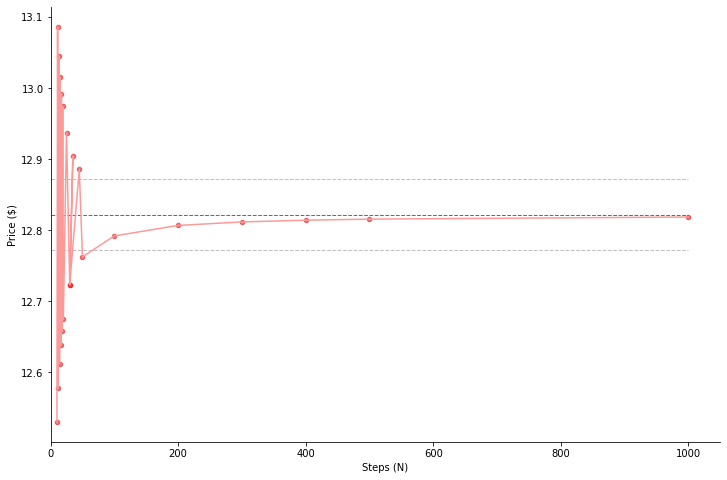

In [13]:
## Plot
plt.figure(figsize = (12, 8))
plt.plot(n_values, option_prices, color = '#fb9a99')
plt.scatter(n_values, option_prices, color = '#e31a1c', s = 20, alpha = 0.6)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.hlines(black_sholes_price + 0.05, 0, 1000, linestyles = 'dashed', linewidth = 1, color = 'grey', alpha = 0.5)
plt.hlines(black_sholes_price, 0, 1000, linestyles = 'dashed', linewidth = 1, color = 'dimgray')
plt.hlines(black_sholes_price - 0.05, 0, 1000, linestyles = 'dashed', linewidth = 1, color = 'grey', alpha = 0.5)
plt.ylabel('Price ($)')
plt.xlabel('Steps (N)')
plt.xlim(xmin = 0)
plt.show()

The graphs shows, in this particular case, that the model converges fairly quickly - it only takes around 100 steps for the model price to be accurate within rounding error. Note that the option has an expiration time of 1 year, and there are roughly 250 trading days in a year, so the model is fairly accurate if we take the step size to be about one trading day.

## Using Monte-Carlo Simulation to Price Asian Options
### Monte Carlo
Monte Carlo experiments and simulations are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. The simulations are used to model the probability of different outcomes in a process that cannot be easily predicted due to the intervention of random variables. It is a technique that can be used to understand the impact of risk and uncertainty in prediction and forecasting models. In short; Monte-Carlo simulation involves creating random variables. These variables have similar properties to the risk factors which the simulation is attempting to simulate.

### Monte Carlo in Finance
Monte Carlo relies on risk neutral valuation. The risk neutral valuation gives investors a mathematical interpretation of the overall market's risk averseness to a particular asset, which must be taken into account in order to estimate the correct price for that asset. A risk neutral measure is also known as an equilibrium measure or equivalent martingale measure. Modern financial theory says that the current value of the asset should be worth the present value of the expected future returns on that asset. This makes intuitive sense, however there is a problem with this thinking, and that is that investors are __risk averse__, or more afraid to lose money than they are eager to make it. This tendency often results in the price of an asset being somewhat below the expected future returns on that asset. As a result, investors must adjust for the risk aversion; and risk-neutral measures are an attempt to do this.

### The Technique
The technique applied to through Monte Carlo methods for option pricing follows:

        1. Generate a **large** number of possible, but random, price paths for the underlying asset via simulations
        2. Calculate the associated exercise value (or "payoff") of the option for each of the paths
        3. Average out all the "payoffs"
        4. Discount them to today

The result is the value of the option! The final option price found through the Monte Carlo simulations will extremely close to the price of the same option calculated through the Black Sholes formula.

Monte Carlo Methods are particularly useful in the valuation of options with multiple sources of uncertainty or with complicated features, which would make them difficult to value through a straightforward Black–Scholes-style or lattice based computation. The technique is thus widely used in valuing path dependent structures like lookback- and Asian options and in real options analysis.

### Stochastic Calculus
Stochastic calculus is the area of mathematics that deals with processes containing a stochastic component and thus allows the modeling of random systems. Many stochastic processes are based on functions which are continuous, but nowhere differentiable. This rules out differential equations that require the use of derivative terms, since they are unable to be defined on non-smooth functions. Instead, a theory of integration is required where integral equations do not need the direct definition of derivative terms. In quantitative finance, the theory is known as Ito Calculus.

#### Markov Process
A Markov chain (process in continuous-time) is a stochastic model describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. Prices of a financial transaction follow a random walk. This random walk is known as a Markov process. It indicates that the process is stochastic in nature and the future price values are only dependent on the current price. 

#### Wiener Process/Standard Brownian Motion
A sequence of random variables $B(t)$ is a **Brownian motion** if $B(0) = 0$, and for all $t$, $s$ such that $s < t$, $B(t)-B(s)$ is normally distributed with variance $t-s$ and the distribution of $B(t)-B(s)$ is independent for $B(r)$ for $r \leq s$. Brownian motions are finite, Brownian motions have unbound variation, Brownian motions are continuous and Brownian motions satisfy both the Markov and Martingale properties.  

#### Generalized Wiener Process
The generalized Wiener process is a variable that not only behaves like a Wiener process but is also one such that the drift rate and the variance rate (volatility) can be set equal to any chosen constants.

#### Itô Process
An Itô process is defined to be an adapted stochastic process that can be expressed as the sum of an integral with respect to Brownian motion and an integral with respect to time. In other words, the generalized Wiener process's trend and volatility are dependent on the time present value of the underlying asset. This is a Markov process as the past is irrelevant for an Itô process. It can be written (simply) as:

$$ \delta S_{t} = Drift + Uncertainty $$

#### Geometric Brownian Motion
A **Geometric Brownian motion (GBM)** is the exponential of the Wiener-process (Brownian motion) with drift. GBM is an example of Itô's process. Geometric Brownian motion for a variable (spot price) $S$ is:

$$\delta S_{t} = S_{t}\mu\delta t + S_{t} \sigma \sqrt{\Delta t \epsilon} $$

Where $\sigma$ is volatility and $\epsilon$ is a random variable with standard normal distribution $N(0,1)$. The GBM process is basic in nature because it does not incorporate mean-revision and time-dependent volatility. As a consequence, GBM is not consistent with option prices that display long term revisions to the face value. As the name implies, the process is geometric in nature because the drift and volatility are proportional to the current value of $S$.

Itô's lemma calculates the differential of a variable as a function of time and a stochastic process. Therefore the solution of the stochastic differential equation of GBM by applying Itô's lemma is:

$$ S_{t} = S_{0}e^{[(\mu - \frac{\sigma^{2}}{2})t + (\sigma \sqrt t) \epsilon]} $$

In [14]:
## Monte Carlo Simulation Function
np.random.seed(1)
def sim_stocks(S0, r, sigma, nSims, steps = 252, T = 5):
    
    nSims = nSims
    sim_steps = steps * T
    dt = 1 / steps
    div = 0
    mu = (r - div - 0.5 * sigma * sigma ) * dt
    sigma = sigma * math.sqrt(dt)
    St = np.zeros(shape = (sim_steps, nSims))
    St[0, ] = S0
    
    for i in range(1, sim_steps):
            for j in range(0, nSims):
                e = np.random.randn(1)
                St[i, j] = St[i - 1, j] * math.exp(mu + sigma * e)
                
    return(St)

In [15]:
sim_stocks = np.vectorize(sim_stocks)
sim_stocks = sim_stocks(100, 0.05, 0.25, 10000, 11 , 1)

In [16]:
import pandas as pd
pd.DataFrame(sim_stocks).head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,84.530712,104.849932,109.516552,102.685739,100.654228,105.250489,101.921189,98.844510,103.212319,107.515238,...,88.982996,94.854126,89.380331,113.253511,102.562278,104.657326,88.508295,91.812913,99.557048,94.106787
2,89.643218,103.884448,91.838465,96.058765,102.586140,103.054669,96.958671,94.080342,103.762551,104.335911,...,94.873574,110.881315,110.390232,106.413678,100.203406,95.313326,110.541256,92.845787,98.296642,99.191805
3,98.648260,105.502238,93.781424,97.774826,87.318819,104.414060,84.850523,88.501351,103.209877,98.707754,...,96.497274,96.046970,120.587276,101.207074,97.700142,86.077525,106.343191,95.267442,109.446614,92.614911
4,109.363531,100.978888,95.936580,105.439052,95.063250,105.698835,84.538571,87.583016,93.943236,102.729395,...,89.170105,85.947397,121.775492,90.378178,96.700555,82.631670,100.191156,94.587295,103.349556,91.980607


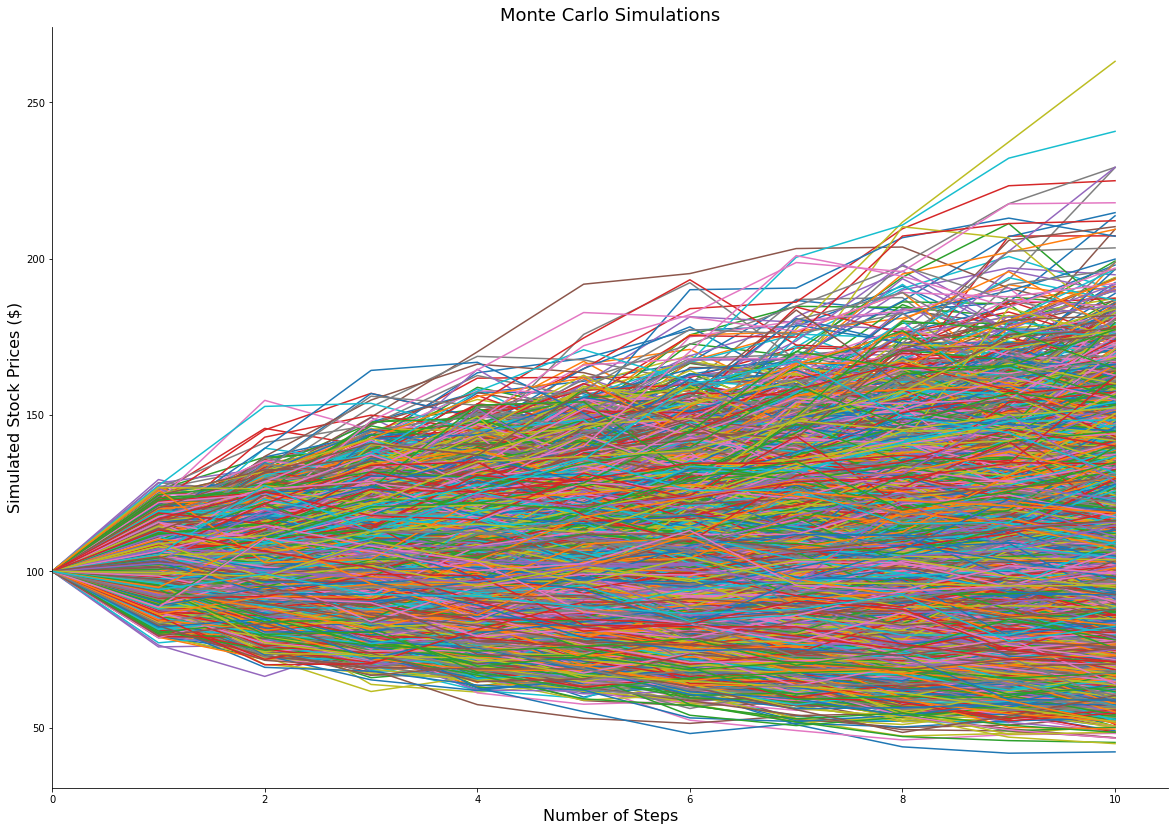

In [33]:
## Plotting the simulations
plt.figure(figsize = (20, 14))
plt.plot(pd.DataFrame(sim_stocks))
plt.title("Monte Carlo Simulations", size = 18)
plt.xlabel("Number of Steps", size = 16)
plt.ylabel("Simulated Stock Prices ($)", size = 16)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlim(xmin = 0)
plt.show()

As can be seen from observing all the paths on the plot, the simulation is resource intensive. If an analytical technique for valuing the option exists—or even a numeric technique, such as a (modified) pricing tree —Monte Carlo methods will usually be too slow to be competitive. They are, in a sense, a method of last resort. However, With faster computing capability this computational constraint is less of a concern and will continue to diminish as computing power becomes cheaper and better.

### Payoff
Prices of an Asian option for different strikes are obtained by simulating 10,000 paths and computing their average. Because th functions is simulating different samples, the 95% confidence intervals can be computed to get a sense of the range of likely option prices for different strikes. 

In [18]:
## Option price with different Strikes
K_values = [90, 100, 110, 120]

for K in K_values:
    sim_stocks = pd.DataFrame(sim_stocks)
    prices = []
    payoffs = []
    steps = 11
    sim_steps = steps * 1
    r = 0.05
    T = 1

    for i in range(0,sim_steps):
        prices.append(np.mean(sim_stocks [i])) # Taking the arithmetic mean
        payoffs.append(max(prices[i] - K, 0) * math.exp(-r * T))

    arithmetic_opt_price  = round(np.mean(payoffs), 4)
    variance = round(np.var(payoffs), 4)
    standard_deviation = round(np.std(payoffs), 4)
    payoff_95_ci = np.percentile(payoffs, [2.5, 97.5])
    
    print(
        f'The option price with a strike (K) of {K} is ${arithmetic_opt_price}. '
        f'The variance is {variance} and the standard error is'
        f' {standard_deviation}.', '\n', f'The 95% confidence intervals are {payoff_95_ci}', '\n')

The option price with a strike (K) of 90 is $10.3888. The variance is 116.9546 and the standard error is 10.8146. 
 The 95% confidence intervals are [ 0.11146903 33.90071081] 

The option price with a strike (K) of 100 is $4.4212. The variance is 73.8952 and the standard error is 8.5962. 
 The 95% confidence intervals are [ 0.         24.38841657] 

The option price with a strike (K) of 110 is $1.9124. The variance is 30.2703 and the standard error is 5.5018. 
 The 95% confidence intervals are [ 0.         14.87612232] 

The option price with a strike (K) of 120 is $0.8838. The variance is 7.8112 and the standard error is 2.7949. 
 The 95% confidence intervals are [0.         7.29144267] 



## Dynamic Hedging in the Black-Scholes Model
Delta hedging is an options trading strategy that aims to reduce, or hedge, the directional risk associated with price movements in the underlying asset. The approach uses options to offset the risk to either a either a single option holding or an entire portfolio. The goal is to reach a delta neutral state and not have any directional bias on the hedge

### What Is Delta?
Delta is a ratio that compares the change in the price of an asset to the corresponding price of that assets derivative. Delta $(\delta)$ expresses the amount of price change a derivative will see based on the price of the underlying security. The ratio can be positive or negative. $\delta$ values between 0 and 1 for call options because as the underlying asset increases in price, call options increase in price. $\delta$ values between -1 to 0 for put options because as the underlying security increases in price, the value of the put option decreases.

Delta is a key variable within models like the Black-Sholes and other advanced pricing models that help option buyers and sellers because it can determine how option prices are likely to change as the price of the underlying security varies in price.

### Use of Delta in Hedging
Call option delta behavior depends on whether the option is **"in-the-money"**, **"at-the-money"** or **"out-of-the-money"**. In-the-money call options get closer to 1 as their expiration approaches. At-the-money tend to have a delta value of 0.5, while "out-of-the-money" call option deltas approach 0 as their expiration nears. The deeper in-the-money the call option, the closer the delta will be to 1, and the more the option will behave like the underlying asset.


The simplest type of delta hedging involves a investor that buys or sells options, and offsets the delta risk by buying or selling an equivalent amount of stock. Delta hedging attempts to neutralize the extent of an options price relative to the assets price, it requires constant rebalancing of the hedge

### Reaching Delta Neutral
An options position can be hedged with options exhibiting delta that is opposite to that of the current options holding to maintain a delta neutral position. A delta neutral position is one in which the overall delta is zero, which minimizes the options' price movements in relation to the underlying asset. 

Delta hedging can benefit traders when they anticipate a strong movement in the underlying stock, but run the risk of being over hedged if the stock doesn't move as much as expected. If over hedged positions have to unwind, the trading costs increase.

        Pros: 
        - Delta hedging allows traders to hedge the risk of adverse price changes in a portfolio
        - It can protect profits from an option or stock position in the short-term without unwinding the long-term holdings

        Cons: 
        - Numerous transactions might be needed to constantly adjust the delta hedge leading to high fees
        - Traders can also over hedge if the delta is offset too much or if the markets change unexpectedly after the hedge 
        is placed
        
Below a code to replicate the payoff of the call option using a self-financing trading strategy where the portfolio is re-balanced to break even at maturity is built

### Calculating Delta $(\delta)$
Delta is found using the usual Black-Sholes option variables such that:

$$ \delta = N(d_{1})     $$

Where:

$$ d_{1} = \frac{ln(\frac{S_{T}}{K}) + (r + \frac{\sigma^{2}}{2}) T } {\sigma \sqrt{T}} $$

$N$ is the standard normal cumulative distribution function (CDF).

The below code can be used to calculate an options delta for a certain spot and strike price, time to maturity, dividend rate, interest rate and volatility.

In [19]:
## Black-Sholes Call
def black_scholes_delta(S, K, T, c, r, sigma):

    # S: spot price
    # K: strike price
    # T: time to maturity
    # c: dividend rate of the asset (assumed continous rate)
    # r: interest rate
    # sigma: volatility of asset

    d1 = (np.log(S / K) + (r - c + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - (sigma * np.sqrt(T))   
    call = (np.exp(-c * T) * S * si.norm.cdf(d1, 0, 1)) - (np.exp(-r * T) * K * si.norm.cdf(d2, 0, 1))
    delta = np.exp(-c * T) * si.norm.cdf(d1, 0, 1)

    return call, delta

In [20]:
black_scholes_delta(400, 100, 0.5, 0.01, 0.01, 0.3)

(298.5037437580004, 0.9950124791771945)

The function returns an option price of just below 300, and a delta close to 1. This is expected as the option is deep in the money, and the value of the option is essentially the underlying stock price minus the strike. 

### Replication Strategy
One of the key underlying assumption of the Black-Scholes formula is the assumption of constant implied volatility. When this assumption holds, the P&L of delta hedging should (on average) be equal to 0. In real life however, this is not the case, and investors can therefore make a profit or loss depending on what the true volatility is relative to the implied volatility going into the Black-Scholes formula. 

The formula used to calculate the replication strategy followed in each period as the stock price changes is below:

$$ P_{0} := C_{0}     $$

$$ P_{t_{i}+1} = P_{t_{i}} + (P_{t_{i}} - \delta_{t_{i}} + S_{t_{i}})r\Delta t + \delta_{t_{i}} + (S_{t_{i+1}} + cS_{t_{i}}\Delta t - S_{t_{i}})$$

Where $P_{t}$ is the time $t$ value of discrete-time self-financing strategy that attempts to replicate the option payoff. And $C_{0}$ is the initial value of the option.

$\Delta t := t_{i+1} - t_{i}$ is the length of time between re-balancing  
$r$ is the annual risk-free interest rate (assuming per-period compounding)  
$\delta_{t_{i}}$ is the Black-Sholes delta at time $t_{i}$  
$c$ is the dividend yield  

### Profit n' Loss 
A Monte Carlo Simulation will be built to estimate the portfolio replication strategy at each period while underlying stock prices change. The overall objective is to hedge the portfolio to have a breakeven with the intrinsic value of the option at maturity. 

P&L will be simulated using different volatilities for calculating the underlying and calculating the deltas in order to identify the impact on the P&L. Following plots will show the histograms of the P&L from this delta-hedging strategy for 100,000 paths for three different scenarios.

In [21]:
def delta_hedge(S, K, T, sigma, imp_sigma, r, c, N, n):
    
    dt = T / N
    price_array = np.zeros([N + 1, n])
    delta_array = np.zeros([N + 1, n])
    PnL = np.zeros([N + 1, n])
    strike_array = np.zeros([1, n])
    PnL_diff = np.zeros([1, n])

    for i in range(n):
        price_array[0, i] = S
        delta_array[0, i] = black_scholes_delta(S, K, T, c, r, imp_sigma)[1]
        PnL[0, i] = black_scholes_delta(S, K, T, c, r, imp_sigma)[0]

        for j in range(1, N + 1):
            price_array[j, i] = price_array[j - 1, i] * np.exp(dt * (r - ((sigma) ** 2) / 2) + 
                                                                     (np.sqrt(dt)) * np.random.randn(1) * sigma)
            delta_array[j, i] = black_scholes_delta(price_array[j, i], K, T, c, r, sigma)[1]

            PnL[j, i] = PnL[j - 1, i] + (PnL[j - 1, i] - delta_array[j - 1, i] * 
                                         price_array[j - 1, i]) * r * dt + delta_array[j - 1, i] * (
                price_array[j, i] + c *dt * price_array[j - 1, i] - price_array[j - 1, i])
             
        strike_array[0, i] = max(price_array[N, i] - K, 0)
        PnL_diff[0, i] = PnL[N, i] - strike_array[0, i]
        
    return price_array, PnL, PnL_diff

#### Implied Volatility equals to True Volatility
This is an impossible case in reality as it is impossible to know the true volatility of the asset and the volatility of the asset might change as time progresses. 

In [22]:
%%time
pnl = delta_hedge(100, 100, 1, 0.3, 0.3, 0.01, 0.01, 252, 1000)

Wall time: 2min 32s


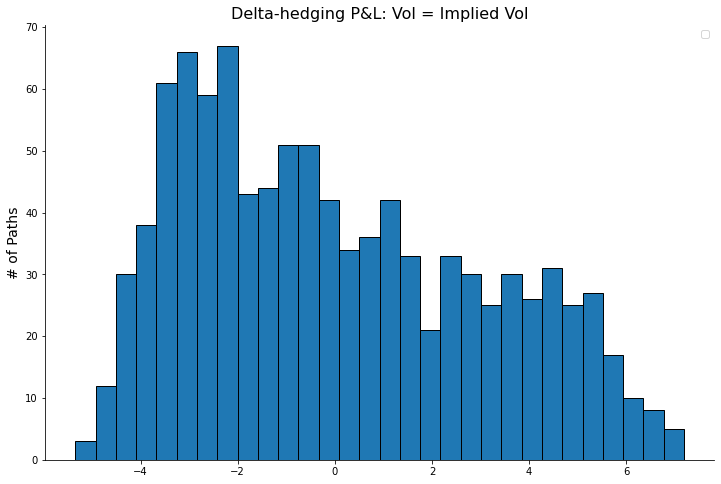

In [23]:
## Plotting PnL histogram
pnl_df = pd.DataFrame(pnl[2])

pnl_df.T.plot.hist(bins = 30, edgecolor='black', figsize = (12, 8), color = '#1f78b4')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.title('Delta-hedging P&L: Vol = Implied Vol', size = 16)
plt.ylabel('# of Paths', size = 14)
plt.legend([])
plt.show()

#### Implied Volatility $>$ True Volatility
There is a profit expected in this hedging strategy because $P&L > 0$ at maturity.

In [24]:
%%time
pnl = delta_hedge(100, 100, 1, 0.3, 0.4, 0.01, 0.01, 252, 1000)

Wall time: 2min 36s


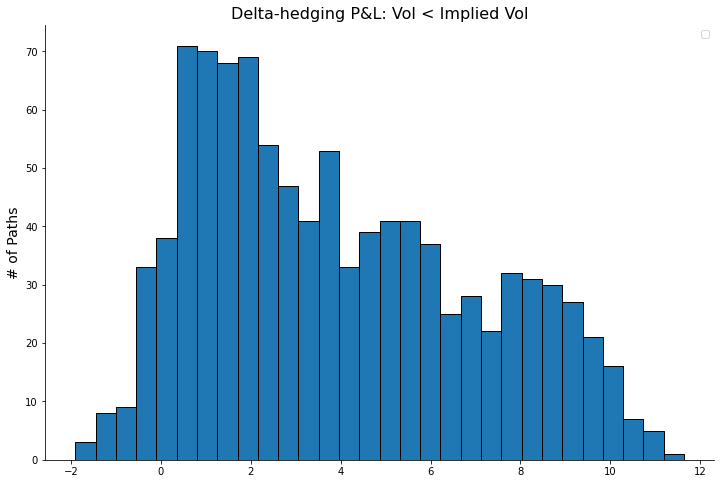

In [25]:
## Plotting PnL histogram
pnl_df = pd.DataFrame(pnl[2])

pnl_df.T.plot.hist(bins = 30, edgecolor='black', figsize = (12, 8), color = '#1f78b4')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.title('Delta-hedging P&L: Vol < Implied Vol', size = 16)
plt.ylabel('# of Paths', size = 14)
plt.legend([])
plt.show()

#### Implied Volatility $<$ True Volatility
There is a loss expected in this hedging strategy because $P&L < 0$ at maturity.

In [26]:
%%time
pnl = delta_hedge(100, 100, 1, 0.3, 0.2, 0.01, 0.01, 252, 1000)

Wall time: 3min 23s


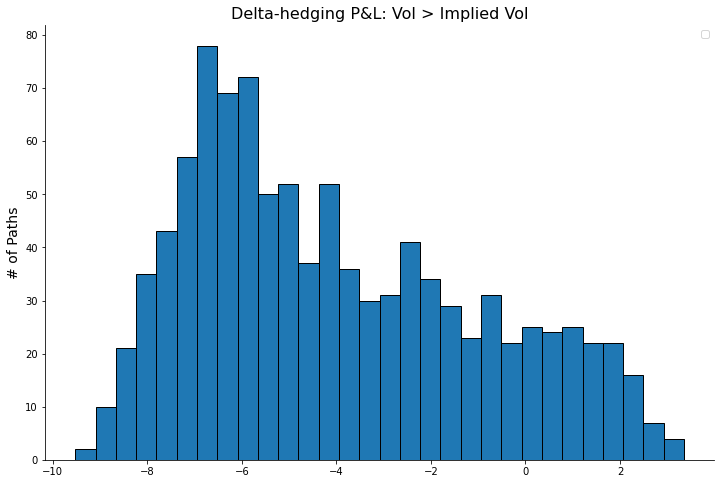

In [30]:
## Plotting PnL histogram
pnl_df = pd.DataFrame(pnl[2])

pnl_df.T.plot.hist(bins = 30, edgecolor='black', figsize = (12, 8), color = '#1f78b4')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.title('Delta-hedging P&L: Vol > Implied Vol', size = 16)
plt.ylabel('# of Paths', size = 14)
plt.legend([])
plt.show()

The histograms help an investor get a sense of the possible profit and loss outcome based on the options parameters.

## Conclusion
Merton and Scholes received the 1997 Nobel Memorial Prize in Economic Sciences for their work with the Black-Sholes model. The formula is a fantastic way to hedge the option by buying and selling the underlying asset in just the right way and, as a consequence, to eliminate risk. However, it has its flaws, mostly from its relaxed and unrealistic assumptions that did not capture extreme movements such as stock market crashes. The model has been refined since its publication in 1973 so that it faciliates for a type of hedging called "continuously revised delta hedging" which is the basis of more complicated hedging strategies such as those engaged in by investment banks and hedge funds. In order to use the model to price and value options on live trading data more sophistcated calcultions are needed that would adjust for the assumptions made in this paper.

Delta $(\delta)$ is known as one of the "Greeks". "The Greeks" measure the sensitivity of the value of a derivative or a portfolio to changes in parameter value(s) while holding the other parameters fixed. They are partial derivatives of the price with respect to the parameter values. One Greek, "gamma" $(\gamma)$ (as well as others not listed here) is a partial derivative of another Greek, "delta  $(\delta)$in this case. These need to be understood well and calculated thoroughly as they provide the investor with much more information about the derivative. They can be obtained by differentiation of the Black–Scholes formula and is beyond the scope of this paper but it will be included in a future project. 

The next steps and future work will be to study risk management and scenario analysis for these option portfolios. The scenario approach to risk management defines a number of scenarios where in each scenario various risk factors, e.g. the price of the underlying security and implied volatility, are assumed to have moved by some fixed amounts. For example, a scenario might assume that all stock prices have fallen by 10% and all implied volatilities have increased by 5 percentage points. Another scenario might assume the same movements but with an additional steepening of the volatility surface. The risk of a portfolio could then be determined by computing the P&L in each scenario and then considering the results, taking action (to reduce risk) where appropriate.

## Further Reading
#### Derivatives
https://www.thebalance.com/what-are-derivatives-3305833  
https://www.investopedia.com/terms/d/derivative.asp

#### Options
https://www.thestreet.com/investing/what-is-options-trading-14772273  
https://www.investopedia.com/terms/o/option.asp

#### Black-Sholes Model
https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model  
https://www.investopedia.com/terms/b/blackscholes.asp

#### Binomial Model
https://www.investopedia.com/terms/b/binomialoptionpricing.asp  
https://xplaind.com/552187/binomial-options-pricing-model

#### Monte Carlo  
https://en.wikipedia.org/wiki/Monte_Carlo_methods_in_finance  
https://towardsdatascience.com/the-house-always-wins-monte-carlo-simulation-eb82787da2a3

#### Delta Hedging
https://www.investopedia.com/terms/d/deltahedging.asp  
https://www.projectoption.com/what-is-delta-hedging/